## MAGIC Imputation of ovarian cancer cells

MAGIC first learns the data's underlying structure and then smooths gene expression values over this structure using a cell-cell affinity graph to construct a Markov diffusion operator. This operator is used to diffuse data between cells, filling in missing values and denoising the data.

In [12]:
# Load packages
import magic
import scprep

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# Matplotlib command for Jupyter notebooks only
%matplotlib inline

In [32]:
# Load data - expression matrix
sc_data = scprep.io.load_csv("/Users/xuexiao/Desktop/Lab/Projects/Dedifferentiation/Data/in_house_oc_data.csv", cell_axis= 'column')

# Check data (first 10 rows)
sc_data.head(10)

,MIR1302-2HG,FAM138A,OR4F5,AL627309.1,AL627309.3,AL627309.2,AL627309.5,AL627309.4,AP006222.2,AL732372.1,...,AC133551.1,AC136612.1,AC136616.1,AC136616.3,AC136616.2,AC141272.1,AC023491.2,AC007325.1,AC007325.4,AC007325.2
AS_AAACCCAAGCGTTAGG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AS_AAACCCACAAACCACT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AS_AAACCCACAACGTTAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AS_AAACCCAGTCCGGTGT-1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AS_AAACGAAAGTGGACTG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AS_AAACGAACAATTCTTC-1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AS_AAACGAAGTAGGAGGG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AS_AAACGAATCTATGCCC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AS_AAACGCTTCTGATGGT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AS_AAAGAACGTCGAGTTT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


After loading your data, you're going to want to determine the molecule per cell and molecule per gene cutoffs with which to filter the data, in order to remove lowly expressed genes and cells with a small library size.

/Users/xuexiao/.local/lib/python3.10/site-packages/scprep/plot/utils.py:104: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


,AL627309.1,AL627309.5,LINC01409,LINC01128,LINC00115,FAM41C,LINC02593,SAMD11,NOC2L,KLHL17,...,MT-ND6,MT-CYB,BX004987.1,AC145212.1,MAFIP,AC011043.1,AL354822.1,AL592183.1,AC240274.1,AC007325.4
AS_AAACCCAAGCGTTAGG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AS_AAACCCACAAACCACT-1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,4.0,137.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AS_AAACCCACAACGTTAC-1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,7.0,51.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AS_AAACCCAGTCCGGTGT-1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,5.0,108.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AS_AAACGAAAGTGGACTG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,1.0,136.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
AS_AAACGAACAATTCTTC-1,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,...,9.0,417.0,0.0,1.0,1.0,0.0,0.0,4.0,0.0,0.0
AS_AAACGAAGTAGGAGGG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AS_AAACGAATCTATGCCC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,163.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
AS_AAACGCTTCTGATGGT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,63.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
AS_AAAGAACGTCGAGTTT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


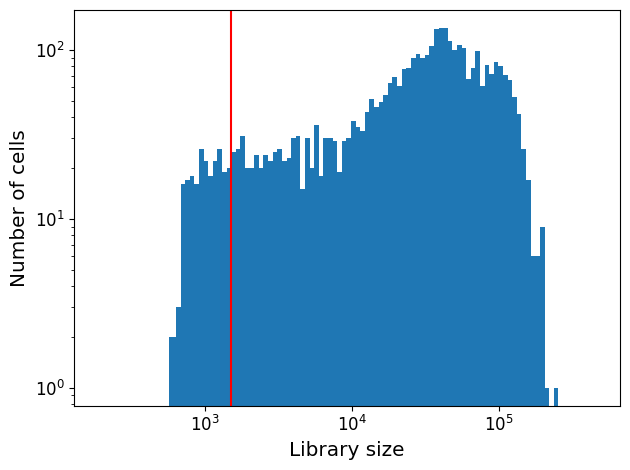

In [33]:
# Filter data
scprep.plot.plot_library_size(sc_data, cutoff = 1500)
sc_data = scprep.filter.filter_library_size(sc_data, cutoff=1500)
sc_data = scprep.filter.filter_rare_genes(sc_data, min_cells=10)
sc_data.head(10)

In [34]:
# Normalization
sc_data = scprep.normalize.library_size_normalize(sc_data)
sc_data = scprep.transform.sqrt(sc_data)
sc_data.head(10)


,AL627309.1,AL627309.5,LINC01409,LINC01128,LINC00115,FAM41C,LINC02593,SAMD11,NOC2L,KLHL17,...,MT-ND6,MT-CYB,BX004987.1,AC145212.1,MAFIP,AC011043.1,AL354822.1,AL592183.1,AC240274.1,AC007325.4
AS_AAACCCAAGCGTTAGG-1,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,3.689811,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0
AS_AAACCCACAAACCACT-1,0.0,0.000000,0.528162,0.000000,0.0,0.000000,0.0,0.000000,0.528162,0.0,...,1.056325,6.181983,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0
AS_AAACCCACAACGTTAC-1,0.0,0.000000,0.581062,0.000000,0.0,0.581062,0.0,0.000000,0.000000,0.0,...,1.537344,4.149609,0.581062,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0
AS_AAACCCAGTCCGGTGT-1,0.0,0.492928,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.697105,0.0,...,1.102220,5.122657,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0
AS_AAACGAAAGTGGACTG-1,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.846576,0.0,...,0.488771,5.700002,0.000000,0.000000,0.000000,0.0,0.0,0.488771,0.000000,0.0
AS_AAACGAACAATTCTTC-1,0.0,0.308041,0.308041,0.308041,0.0,0.308041,0.0,0.000000,0.435636,0.0,...,0.924123,6.290375,0.000000,0.308041,0.308041,0.0,0.0,0.616082,0.000000,0.0
AS_AAACGAAGTAGGAGGG-1,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.720507,0.000000,0.0,...,0.000000,5.094752,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0
AS_AAACGAATCTATGCCC-1,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,1.013405,5.786178,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.453208,0.0
AS_AAACGCTTCTGATGGT-1,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.597284,0.0,...,0.597284,4.740793,0.000000,0.000000,0.000000,0.0,0.0,0.597284,0.000000,0.0
AS_AAAGAACGTCGAGTTT-1,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.851133,0.0,...,0.000000,1.474206,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0


Default setting: MAGIC creates an operator with the following default values: knn=5, knn_max = 3 * knn, decay=1, t=3.

In [35]:
# Run MAGIC
magic_operator = magic.MAGIC()
sc_magic = magic_operator.fit_transform(sc_data)

Calculating MAGIC...
  Running MAGIC on 3576 cells and 20555 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 12.43 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.71 seconds.
    Calculating affinities...
    Calculated affinities in 0.63 seconds.
  Calculated graph and diffusion operator in 13.83 seconds.
  Running MAGIC with `solver='exact'` on 20555-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 3.31 seconds.
Calculated MAGIC in 17.26 seconds.


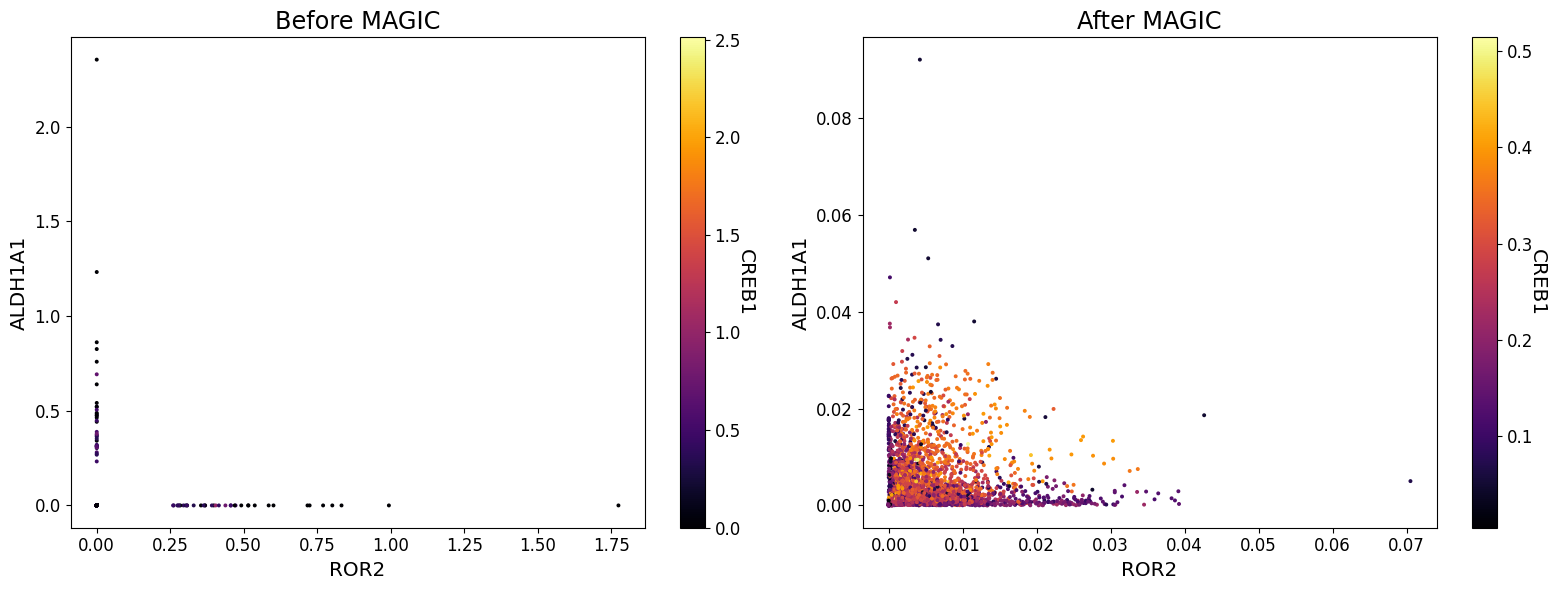

In [37]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 6))

scprep.plot.scatter(x=sc_data['ROR2'], y=sc_data['ALDH1A1'], c=sc_data['CREB1'],  ax=ax1,
                    xlabel='ROR2', ylabel='ALDH1A1', legend_title="CREB1", title='Before MAGIC')

scprep.plot.scatter(x=sc_magic['ROR2'], y=sc_magic['ALDH1A1'], c=sc_magic['CREB1'], ax=ax2,
                    xlabel='ROR2', ylabel='ALDH1A1', legend_title="CREB1", title='After MAGIC')

plt.tight_layout()
plt.show()

In [39]:
# Save imputed data
sc_magic.to_csv("/Users/xuexiao/Desktop/Lab/Projects/Dedifferentiation/Data/in_house_oc_magic.csv")